# Исследование надежности заемщиков


## Открываем таблицу и изучаем общую информацию о данных

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Выведем первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработываем значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Выведем перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

**Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуем данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Чтобы ответит на вопрос надо сгруппировать данные по полю children и посчитать количество строк по каждой группе. 
А дальше мы считаем сколько строк по каждой группе по полю debt со значением 1 и делим это значение на количество 
строк по каждой группе. 
Отсюда увидим долю сколько по каждой группе человек имели задолженность и сможем сделать вывод.

In [22]:
# для начала сгруппируем наш датафрейм по полю children  
children_grouped = data.groupby('children')
# подсчитаем количесво
group_count = children_grouped.size()
# выведем на экран коли-во по каждой группе
print(group_count)

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
dtype: int64


In [23]:
# теперь посчитаем кол-во просрочивших кредит по группам
debt_count = data.groupby(['children', 'debt']).size()
debt_count_1 = debt_count[debt_count.index.get_level_values('debt') == 1]
# выведем на экран
print(debt_count_1)

children  debt
0         1       1063
1         1        444
2         1        194
3         1         27
4         1          4
dtype: int64


In [24]:
# Создаем копию датасета, что бы не работать с исходным
temp = data.copy()
# Напишем функцию, так как все задачи аналогичны
def que(category):
    data_temp = temp.pivot_table(index=category, values='debt', aggfunc=['count', 'sum', 'mean'])
    data_temp.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников']
    # Оформим таблицу цветным градиентом, но можно ее вывести и просто display(data_temp)
    display(data_temp.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))
    
que('children')

,Всего кредитополучателей,Всего должников,Доля должников
children,,,
0,14091.000,1063.000,0.075
1,4808.000,444.000,0.092
2,2052.000,194.000,0.095
3,330.000,27.000,0.082
4,41.000,4.000,0.098
5,9.000,0.000,0.000


Дальше мы вычислим долю людей с задолжностью и без по каждой группе

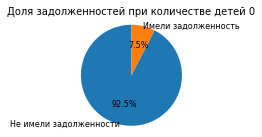

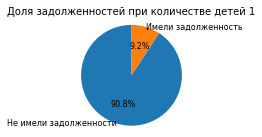

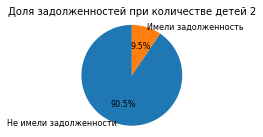

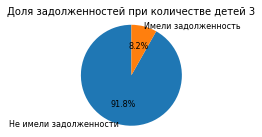

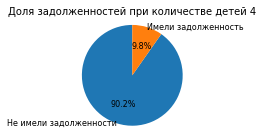

In [25]:
# Доля людей с задолжностью
part_of_dept_1 = debt_count_1/group_count
# Доля людей без задолженности part_of_dept_0
no_debt_part_count = group_count - debt_count_1
part_of_dept_0 = no_debt_part_count/group_count

# Для наглядности построим круговые диаграммы по кадой группе
import matplotlib.pyplot as plt

for i, children_group in enumerate(part_of_dept_1.index):
    plt.figure(figsize=(2, 2)) 
    plt.pie(
        [part_of_dept_0[children_group], part_of_dept_1[children_group]],
        labels=["Не имели задолженности", "Имели задолженность"],
        autopct='%1.1f%%',
        startangle=90,
        labeldistance=1,
        textprops={'fontsize': 8}
    )
    plt.title(f"Доля задолженностей при количестве детей {i}", fontsize=10)
    plt.axis('equal')  
    plt.show()


Давайте теперь объединим все значения в одну столбчатую диаграмму по которой нам будет легче сделать вывод.

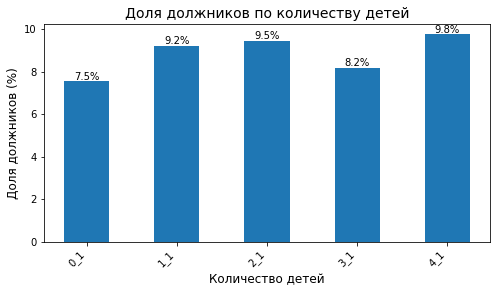

In [26]:
# Объединяем данные для столбчатой диаграммы
data_for_bar = pd.DataFrame({
    'Количество детей': ['_'.join(map(str, x)) for x in part_of_dept_1.index],  # Преобразуем MultiIndex в список строк
    'Доля должников': part_of_dept_1.values * 100,  # Преобразуем в проценты
})

# Преобразуем кортежи в строки
data_for_bar['Количество детей'] = [''.join(map(str, x)) for x in data_for_bar['Количество детей']]

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 4))  # Уменьшаем размер диаграммы
bars = plt.bar(data_for_bar['Количество детей'], data_for_bar['Доля должников'], width=0.5)
plt.xlabel('Количество детей', fontsize=12)
plt.ylabel('Доля должников (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи на 45 градусов
plt.title('Доля должников по количеству детей', fontsize=14)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

**Вывод:** 

Количество детей влияет на просроченную задолженность. Но зависимость не пропорциональная, а зависит от группы. Люди с 4 детьми имели задолженность чаще - 9,8%.бездетей меньше всех - 7,5%. Дальше в группе людей с тремя детьми должников - 8,2%, с одним - 9,2%, а с двумя детьми - 9,5%. Можно вывод что наличие детей влияет на увеличение % должников по кредитам.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Точна такая же логика как и для расчета зависимости от количесва детей, который мы сделали выше.
для начала сгруппируем наш датафрейм по полю family_status

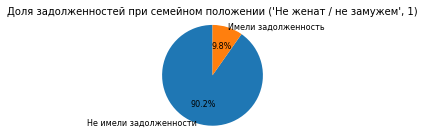

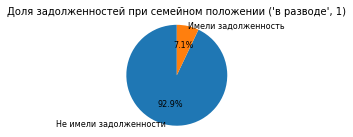

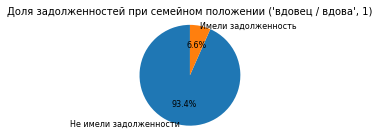

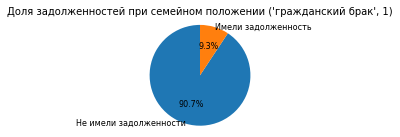

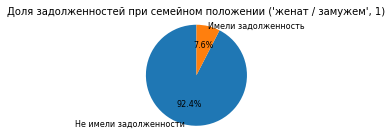

In [27]:
 family_status_grouped = data.groupby('family_status')
# подсчитаем количесво
group_count = family_status_grouped.size()

# теперь посчитаем кол-во просрочивших кредит по группам
debt_count = data.groupby(['family_status', 'debt']).size()
debt_count_1 = debt_count[debt_count.index.get_level_values('debt') == 1]

# Вычисляем доли для диаграммы
part_of_dept_1 = debt_count_1/group_count
no_debt_part_count = group_count - debt_count_1
part_of_dept_0 = no_debt_part_count/group_count

# Для наглядности построим круговые диаграммы по кадой группе
for family_status_group in part_of_dept_1.index:
    plt.figure(figsize=(2, 2)) 
    plt.pie(
        [part_of_dept_0[family_status_group], part_of_dept_1[family_status_group]],
        labels=["Не имели задолженности", "Имели задолженность"],
        autopct='%1.1f%%',
        startangle=90,
        labeldistance=1,
        textprops={'fontsize': 8}
    )
    plt.title(f"Доля задолженностей при семейном положении {family_status_group}", fontsize=10)
    plt.axis('equal')  
    plt.show()

Давайте теперь объединим все значения в одну столбчатую диаграмму по которой нам будет легче сделать вывод.

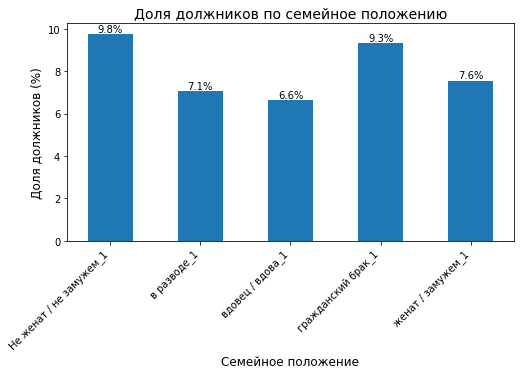

In [28]:
# Объединяем данные для столбчатой диаграммы
data_for_bar = pd.DataFrame({
    'Семейное положение': ['_'.join(map(str, x)) for x in part_of_dept_1.index],  # Преобразуем MultiIndex в список строк
    'Доля должников': part_of_dept_1.values * 100,  # Преобразуем в проценты
})

# Преобразуем кортежи в строки
data_for_bar['Семейное положение'] = [''.join(map(str, x)) for x in data_for_bar['Семейное положение']]

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 4))  # Уменьшаем размер диаграммы
bars = plt.bar(data_for_bar['Семейное положение'], data_for_bar['Доля должников'], width=0.5)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Доля должников (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи на 45 градусов
plt.title('Доля должников по семейное положению', fontsize=14)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

**Вывод:** 

В данном случае видим большую зависимость задолженности по кредитам от семейного положения. Больший % по задолженности имеют люди не женатые/не замужем - 9,8% и в гражданмком браке - 9,3%. Меньше всего люди со статусом вдова/вдовец - 6,6%, люди в разводе - 7,1% и женат/замужем - 7,6%. Можно сделать вывод, что люди пребывающие или которые были в официальных взаимоотношениях менее склонны к задолженности по кредитам.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Чтобы расчитать данную зависимость тем же способом что и предыдущие воспользуемся полем созданным в первой части нашего проекта total_income_category,
которая разбивает людей по дастатку на категории:
- 0–30000 — 'E'
- 30001–50000 — 'D'
- 50001–200000 — 'C'
- 200001–1000000 — 'B'
- 1000001 и выше — 'A'

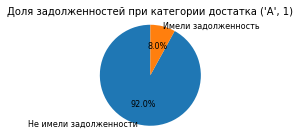

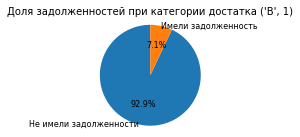

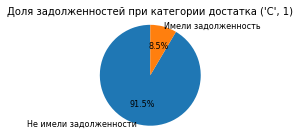

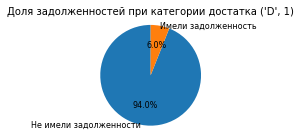

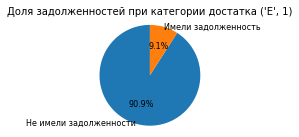

In [29]:
# сгруппируем наш датафрейм по полю total_income_category 
total_income_category_grouped = data.groupby('total_income_category')
# подсчитаем количесво
group_count = total_income_category_grouped.size()

# теперь посчитаем кол-во просрочивших кредит по группам
debt_count = data.groupby(['total_income_category', 'debt']).size()
debt_count_1 = debt_count[debt_count.index.get_level_values('debt') == 1]

# Вычисляем доли для диаграммы
part_of_dept_1 = debt_count_1/group_count
no_debt_part_count = group_count - debt_count_1
part_of_dept_0 = no_debt_part_count/group_count

# Для наглядности построим круговые диаграммы по кадой группе
for total_income_category_group in part_of_dept_1.index:
    plt.figure(figsize=(2, 2)) 
    plt.pie(
        [part_of_dept_0[total_income_category_group], part_of_dept_1[total_income_category_group]],
        labels=["Не имели задолженности", "Имели задолженность"],
        autopct='%1.1f%%',
        startangle=90,
        labeldistance=1,
        textprops={'fontsize': 8}
    )
    plt.title(f"Доля задолженностей при категории достатка {total_income_category_group}", fontsize=10)
    plt.axis('equal')  
    plt.show()



Давайте теперь объединим все значения в одну столбчатую диаграмму по которой нам будет легче сделать вывод.

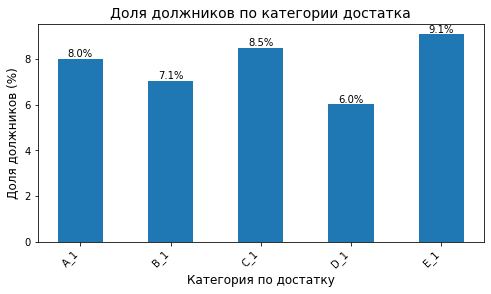

In [30]:
# Объединяем данные для столбчатой диаграммы
data_for_bar = pd.DataFrame({
    'Категория по достатку': ['_'.join(map(str, x)) for x in part_of_dept_1.index],  # Преобразуем MultiIndex в список строк
    'Доля должников': part_of_dept_1.values * 100,  # Преобразуем в проценты
})

# Преобразуем кортежи в строки
data_for_bar['Категория по достатку'] = [''.join(map(str, x)) for x in data_for_bar['Категория по достатку']]

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 4))  # Уменьшаем размер диаграммы
bars = plt.bar(data_for_bar['Категория по достатку'], data_for_bar['Доля должников'], width=0.5)
plt.xlabel('Категория по достатку', fontsize=12)
plt.ylabel('Доля должников (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи на 45 градусов
plt.title('Доля должников по категории достатка', fontsize=14)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

Данные объединены, но вывод мы сможем сделать только по двум категориям. Посмотрим размер выборок по каждой группе:

In [31]:
# Создаем копию датасета, что бы не работать с исходным
temp = data.copy()
# Напишем функцию, так как все задачи аналогичны
def que(category):
    data_temp = temp.pivot_table(index=category, values='debt', aggfunc=['count', 'sum', 'mean'])
    data_temp.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников']
    # Оформим таблицу цветным градиентом, но можно ее вывести и просто display(data_temp)
    display(data_temp.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))
    
que('total_income_category')

,Всего кредитополучателей,Всего должников,Доля должников
total_income_category,,,
A,25.000,2.000,0.080
B,5014.000,354.000,0.071
C,15921.000,1353.000,0.085
D,349.000,21.000,0.060
E,22.000,2.000,0.091


**Вывод:** 

Только две группы имею достаточный размер выборки.
Категория В, достаток 200001–1000000, должников - 7,1%,
Категория С, достаток 50001–200000, должников - 8,5%.
По полученным данным видно, что люди с большим уровнем дохода уемют меньший % задолженности по кредитам.

In [34]:
temp = data.copy()
start, stop = 3, 8 # начальное и конечное количество категорий
while start <= stop:
    temp['new_category'] = pd.qcut(temp['total_income'], q=start, precision=0)
    que('new_category')
    start += 1

,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 119218.0]",7111.000,580.000,0.082
"(119218.0, 172357.0]",7238.000,627.000,0.087
"(172357.0, 2265604.0]",6982.000,525.000,0.075


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 107507.0]",5333.000,427.000,0.080
"(107507.0, 142594.0]",5450.000,480.000,0.088
"(142594.0, 195842.0]",5216.000,444.000,0.085
"(195842.0, 2265604.0]",5332.000,381.000,0.071


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 98514.0]",4267.000,344.000,0.081
"(98514.0, 132113.0]",4266.000,358.000,0.084
"(132113.0, 161380.0]",4266.000,373.000,0.087
"(161380.0, 214604.0]",4266.000,358.000,0.084
"(214604.0, 2265604.0]",4266.000,299.000,0.070


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 92092.0]",3556.000,285.000,0.080
"(92092.0, 119218.0]",3555.000,295.000,0.083
"(119218.0, 142594.0]",3672.000,327.000,0.089
"(142594.0, 172357.0]",3566.000,300.000,0.084
"(172357.0, 228893.0]",3427.000,276.000,0.081
"(228893.0, 2265604.0]",3555.000,249.000,0.070


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 87287.0]",3048.000,233.000,0.076
"(87287.0, 113563.0]",3047.000,262.000,0.086
"(113563.0, 137465.0]",3047.000,263.000,0.086
"(137465.0, 155314.0]",3047.000,264.000,0.087
"(155314.0, 184554.0]",3047.000,257.000,0.084
"(184554.0, 242009.0]",3047.000,242.000,0.079
"(242009.0, 2265604.0]",3048.000,211.000,0.069


,Всего кредитополучателей,Всего должников,Доля должников
new_category,,,
"(20666.0, 83837.0]",2667.000,206.000,0.077
"(83837.0, 107507.0]",2666.000,221.000,0.083
"(107507.0, 127546.0]",2666.000,233.000,0.087
"(127546.0, 142594.0]",2784.000,247.000,0.089
"(142594.0, 166525.0]",2549.000,223.000,0.087
"(166525.0, 195842.0]",2667.000,221.000,0.083
"(195842.0, 254250.0]",2665.000,196.000,0.074
"(254250.0, 2265604.0]",2667.000,185.000,0.069


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

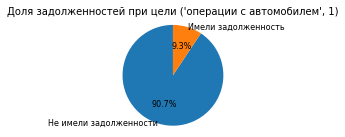

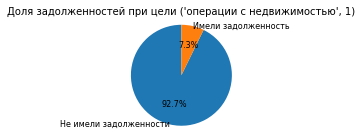

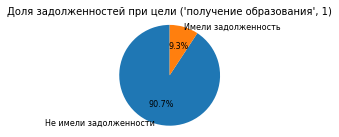

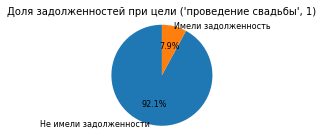

In [32]:
# сгруппируем наш датафрейм по полю purpose_category
purpose_category_grouped = data.groupby('purpose_category')
# подсчитаем количесво
group_count = purpose_category_grouped.size()

# теперь посчитаем кол-во просрочивших кредит по группам
debt_count = data.groupby(['purpose_category', 'debt']).size()
debt_count_1 = debt_count[debt_count.index.get_level_values('debt') == 1]

# Вычисляем доли для диаграммы
part_of_dept_1 = debt_count_1/group_count
no_debt_part_count = group_count - debt_count_1
part_of_dept_0 = no_debt_part_count/group_count

# Создаем круговую диаграмму для каждой группы
for purpose_category_group in part_of_dept_1.index:
    plt.figure(figsize=(2, 2)) 
    plt.pie(
        [part_of_dept_0[purpose_category_group], part_of_dept_1[purpose_category_group]],
        labels=["Не имели задолженности", "Имели задолженность"],
        autopct='%1.1f%%',
        startangle=90,
        labeldistance=1,
        textprops={'fontsize': 8}
    )
    plt.title(f"Доля задолженностей при цели {purpose_category_group}", fontsize=10)
    plt.axis('equal')  
    plt.show()

Давайте теперь объединим все значения в одну столбчатую диаграмму, по которой нам будет легче сделать вывод.

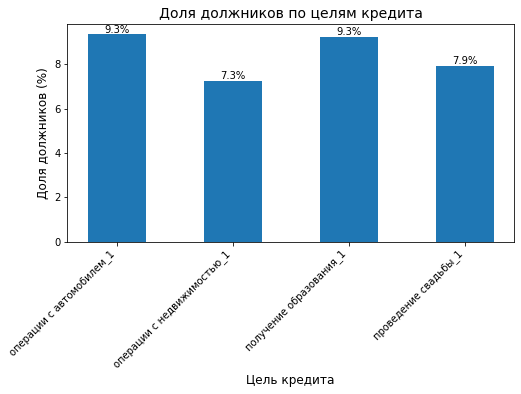

In [33]:
# Объединяем данные для столбчатой диаграммы
data_for_bar = pd.DataFrame({
    'Цель кредита': ['_'.join(map(str, x)) for x in part_of_dept_1.index],  # Преобразуем MultiIndex в список строк
    'Доля должников': part_of_dept_1.values * 100,  # Преобразуем в проценты
})

# Преобразуем кортежи в строки
data_for_bar['Цель кредита'] = [''.join(map(str, x)) for x in data_for_bar['Цель кредита']]

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 4))  # Уменьшаем размер диаграммы
bars = plt.bar(data_for_bar['Цель кредита'], data_for_bar['Доля должников'], width=0.5)
plt.xlabel('Цель кредита', fontsize=12)
plt.ylabel('Доля должников (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи на 45 градусов
plt.title('Доля должников по целям кредита', fontsize=14)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

**Вывод:** 

Максимальная доля задолженностей у двух категорий целей кредита. Получение образования и Ооперации с автомобилем - 9,3% должников. Меньше должников у цели Проведение свадбьы - 7,9%. И мньше всего при операции с недвижимостью - 7,3%.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* <br>
На мой взгляд причины по которым могут появиться пропуски:
- ошибка при вводе данных
- разные источники информации
- изначально неполнота данных
- программные ошибки (сбой программы, ошибка при чтении, поврежденные файлы с данными и т.д.)

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*<br>
Потому что на медианное значение меньше влияет экстрtмальные значения, чем на среднее значение.
К примеру имеем статистику по зарплате сотрудников с одинаковой профессией с зарплатами в т.р. - 200, 200, 200, 800.
Нам нужно нанять сотрудника этой профессии. И применяя медиану мы получим, что нормальная по рынку 200т.р. При среднем значении 350т.р., что выше чем по рынку почти в 2 раза. При массовом найме под проект нужны более доставерные данные по з/п для нанимаемых сотрудников, что как раз обеспечивает нам медианное значение.

### Шаг 4: общий вывод.

**Проект:** Исследование надёжности заёмщиков.

**Заказчик:** Кредитный отдел банка.

**Цель проекта:** Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.



Для проекта нам были предоствалены входные данные от банка — статистика о платёжеспособности клиентов.

Перед тем как приступить к полноценному анализу была проведена предобработка полученных данных, а именно:
- удалены дубликаты,
- пустые данные заполнены медианными значениями,
- выявлены аномольные значения и удалены,
- обработаны неявные дибликаты приведением всех названий к нижнему регистру,
- выделенны категории по достатку клиентов и цели получения кредита.

Для достижения цели проекта был проведен анализ зависимости возврата кредита в срок от наличия детей, семейного роложения, уровня дохода и цели получения кредита и сделаны следующие выводы:

1. Зависимость количества детей влияет на просроченную задолженность. Семьи без детей не несут дополнительных расходов и своевременно   обслуживают свой кредит. У клиентов с детьми более высокая расходная часть семейного бюджета, поэтому и возникают сложности со своевременной выплатой по кредитным обязательствам. Люди с 4 детьми имели задолженность чаще - 9,8%, без детей меньше всех - 7,5%. Дальше в группе людей с тремя детьми должников - 8,2%, с одним - 9,2%, а с двумя детьми - 9,5%.<br>
<br>
2. Зависимость задолженности по кредитам от семейного положения. Больший % по задолженности имеют люди не женатые/не замужем - 9,8% и в гражданмком браке - 9,3%. Меньше всего люди со статусом вдова/вдовец - 6,6%, люди в разводе - 7,1% и женат/замужем - 7,6%. Можно сделать вывод, что люди пребывающие или которые были в официальных взаимоотношениях менее склонны к задолженности по кредитам. Прошлый опыт семейных отношений или оформленные отношения накладывают определенную ответственность и приучают к финансовой дисциплине.<br>
<br>
3. Зависимость между уровнем дохода и возвратом кредита в срок. По данной зависимости только две группы имею достаточный размер выборки.<br> Категория В, достаток 200001–1000000, должников - 7,1%, <br>Категория С, достаток 50001–200000, должников - 8,5%. можем только сделать явный вывод по этим двум группам, что люди с большим уровнем дохода категории B имеют меньший % задолженности по кредитам. В целом же из-за недостатка данных по остальным категориям нельзя сделать общего вывода что уровень достатка влияет на кредитную задолженность.<br>
<br>
4. Зависимость цели кредита на возврат его в срок. Максимальная доля задолженностей у двух категорий целей кредита. Получение образования и Ооперации с автомобилем - 9,3% должников. Меньше должников у цели Проведение свадбьы - 7,9%. И мньше всего при операции с недвижимостью - 7,3%. Видимо, кредиты на автомобиль и обучение несут дополнительные риски связанные или с возможной аварией, или с проблемами трудоустройства после обучения.